# 다중선형회귀 - 농어의 무게 예측 모형 만들기

독립변수가 두 개 이상인 경우의 선형회귀분석

분석 정확도를 높이기 위해 적절하지 않은 변수를 추려내는 과정을 반복적으로 수행하여 최적의 독립변수 그룹을 찾아내는 것을 목표로 한다.

## #01. 준비작업

### [1] 패키지 참조

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

import sys
import numpy as np
import seaborn as sb
from tabulate import tabulate
from matplotlib import pyplot as plt
from pandas import read_excel, DataFrame

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from scipy.stats import t
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

from statsmodels.formula.api import ols

### [2] 그래프 초기화

In [3]:
plt.rcParams['font.family']='AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['axes.unicode_minus']=False

### [3] 데이터 가져오기

In [5]:
origin = read_excel('C:/Users/Jihwan/Desktop/01Class/E.추론통계/E.InferentialStatistics/수업자료/fish.xlsx')
origin.head()

,길이,높이,두께,무게
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0
2,15.0,3.82,2.43,40.0
3,16.2,4.59,2.63,51.5
4,17.4,4.59,2.94,70.0


## #02. 데이터 확인

### [1]  산점도 행렬

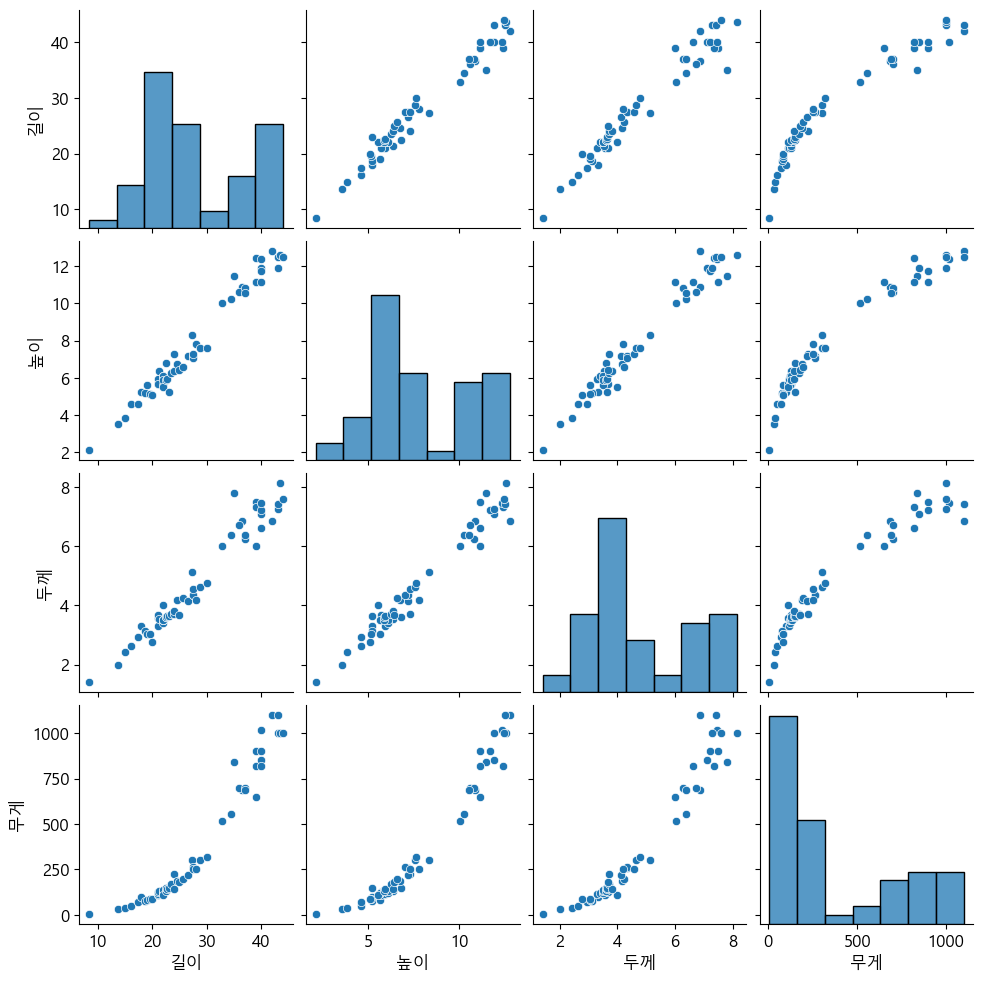

In [6]:
sb.pairplot(origin)
plt.show()
plt.close()

### [2] 상관계수 히트맵

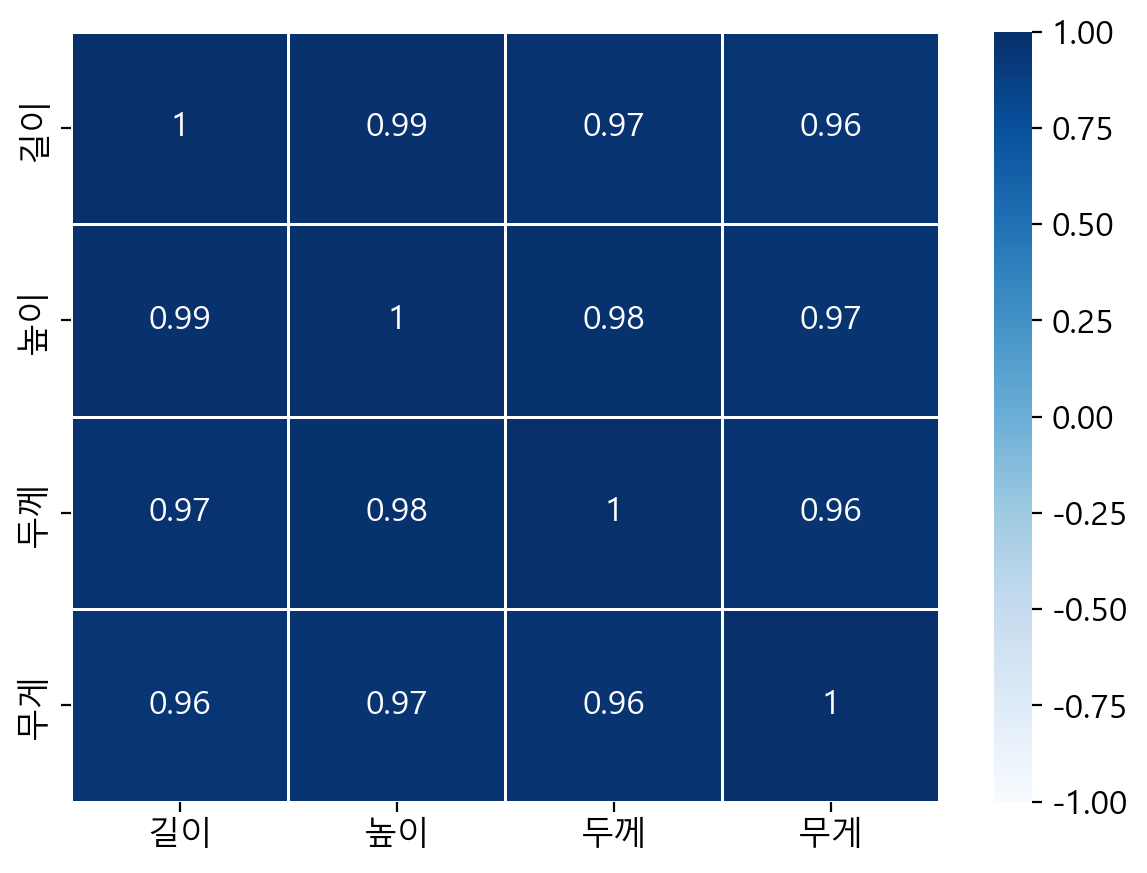

In [7]:
plt.figure(figsize=(7,5), dpi = 200)
sb.heatmap(origin.corr(method='pearson'), annot = True, cmap='Blues',
           vmin = -1, vmax = 1, linewidths = 0.5 )
plt.show()
plt.close()

## #03.  데이터 전처리

데이터를 분리한다.

In [8]:
x = origin[['길이', '높이', '두께']]
y = origin['무게']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=123)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((39, 3), (17, 3), (39,), (17,))

## #04. 선형회귀 분석

In [10]:
yname = '무게'
xnames = x_train.columns
size = len(xnames)

# 분석모델 생성
model = LinearRegression()
fit = model.fit(x_train, y_train)

# 회귀식
expr = "{yname} = ".format(yname = yname)

for i, v in enumerate(xnames):
    expr += '%0.3f * %s + ' % (fit.coef_[i], v)

expr += '%0.3f' % fit.intercept_

print(expr)








무게 = 6.182 * 길이 + 57.255 * 높이 + 70.281 * 두께 + -577.582
